# Gender Classificaton


## Imports

In [1]:
import os
import sys
from scrape import get_remote_tgz_files, download_extract_files
from parse import paths, parse_readme
from pathlib import Path
import sqlite3
import librosa
import librosa.display
import IPython.display
import numpy

## Input variables

In [2]:
SOURCE_URL = '''http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/16kHz_16bit/'''
DATA_DIR = '''data'''
DB = '''genderclass.db'''

## Scrape data
Only files not already downloaded and extracted will be fetched.

In [3]:
data_folder = Path(DATA_DIR)
urls = get_remote_tgz_files(SOURCE_URL)
download_extract_files(urls, data_folder)

## Create DB to hold features

In [3]:
conn = sqlite3.connect(DB)
db = conn.cursor()
db.execute('''DROP TABLE IF EXISTS features''')
db.execute('''CREATE TABLE features
                     (file text, 
                      path text, 
                      female integer, 
                      age text, 
                      language text, 
                      dialect text,
                      cepstrum blob,
                      n_mfcc integer,
                      n_frames integer)''')
conn.commit()
conn.close()

## Extract features
Silence trimmed at beginning and end of each file.

MFCC extracted (with default librosa settings).

Save into database.

In [4]:
import datetime
print(datetime.datetime.now())

data_folder = Path(DATA_DIR)
conn = sqlite3.connect(DB)
db = conn.cursor()
samples = os.listdir(data_folder)

for sample in samples:
    (wav_folder, readme_path) = paths(data_folder, sample)
    meta = parse_readme(readme_path)
    
    wavs = os.listdir(wav_folder)
    #print(wav_folder)
    for wav in wavs:
        y, fs = librosa.load(wav_folder / wav, sr=None)
        y, idx = librosa.effects.trim(y)
        mfcc = librosa.feature.mfcc(y, fs)
                
        db.execute('''INSERT INTO features VALUES
         (?,?,?,?,?,?,?,?,?)''', 
            (wav[:-4], 
            str(wav_folder), 
            meta['gender'] == 'female', 
            meta.get('age range', ''), 
            meta.get('language', ''), 
            meta.get('pronunciation dialect',''),
            bytes(memoryview(mfcc)),
            mfcc.shape[0],
            mfcc.shape[1]))
        
        #break
    conn.commit()

    #db.execute('''SELECT * FROM features''')
    #res = db.fetchall()
    #print(res)
    #mfcc2 = numpy.frombuffer(res[0][6])
    #mfcc2 = numpy.reshape(mfcc2,(res[0][7], res[0][8]))
    #librosa.display.specshow(mfcc2, sr=16000, x_axis='time')
    #break

conn.close()
print(datetime.datetime.now())

2019-03-24 21:42:56.189052
data/anonymous-20090709-jol/wav
data/kenanbit-20130805-onq/wav
data/Nikro-20130520-uks/wav
data/anonymous-20110215-eqq/wav
data/aiden11-20111102-rvp/wav
data/anonymous-20120925-ylv/wav
data/rocketman768-20080409-oip/wav
data/Chrisdan-20081210-yzd/wav
data/B-20091230-umt/wav
data/anonymous-20120719-uja/wav
data/anonymous-20090404-lxa/wav
data/bennmann-20091102-ksm/wav
data/anonymous-20130219-ssc/wav
data/anonymous-20121113-hah/wav
data/benob-20090314-wzw/wav
data/alec-20090912-aws/wav
data/anonymous-20100320-pvf/wav
data/brad-20100823-tki/wav
data/azmisov-20140428-cyp/wav
data/anonymous-20130411-mdo/wav
data/mramige-20100820-zpz/wav
data/chrisspen-20120505-efq/wav
data/pcsnpny-20150303-lih/wav
data/ttm-20071016/wav
data/laserbeams-20081202-knp/wav
data/trimbak-20100315-icl/wav
data/JohanLingen-20080304-wfq/wav
data/paddy-20080911-fdo/wav
data/anonymous-20130708-vtm/wav
data/Catbells-20110527-zjd/wav
data/oeginc-20080228-ezk/wav
data/anonymous-20081225-afe/wav


KeyboardInterrupt: 

In [ ]:
## remember taht you might have to transpose mfcc to train!

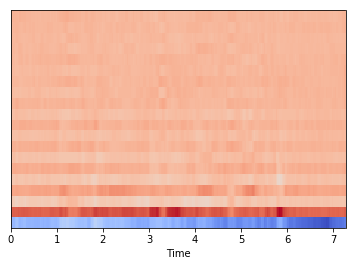

In [44]:
## Possibly rewisit narrower frames:
spec = librosa.feature.melspectrogram(y=y, sr=fs, S=None, n_fft=400, hop_length=160, power=2.0)
mfcc1 = librosa.feature.mfcc(y, fs, S=numpy.log(spec))

librosa.display.specshow(mfcc1, sr=fs, x_axis='time', hop_length=160)
librosa.display.specshow(mfcc2, sr=fs, x_axis='time')

#IPython.display.Audio(y, rate=fs)